## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/raw/Building_1.csv')
carbon_intensity = pd.read_csv('data/raw/carbon_intensity.csv')

data["Carbon Intensity (kg_CO2/kWh)"] = carbon_intensity["kg_CO2/kWh"].values

VARIABLES_TO_FORECAST = [
    "Equipment Electric Power (kWh)", # "non_shiftable_load",
    "DHW Heating (kWh)", # "dhw_demand",
    "Cooling Load (kWh)", # "cooling_demand",
    "Solar Generation (W/kW)", # "solar_generation",
    "Carbon Intensity (kg_CO2/kWh)" # "carbon_intensity",
]

data.head()

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature (C),Average Unmet Cooling Setpoint Difference (C),Indoor Relative Humidity (%),Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Heating Load (kWh),Solar Generation (W/kW),Occupant Count (people),Temperature Set Point (C),HVAC Mode (Off/Cooling/Heating),Carbon Intensity (kg_CO2/kWh)
0,6,1,2,0,22.428127,-0.794095,78.008001,0.356269,0.055730,0.000000,0.0,0.0,3.0,23.222222,1,0.470113
1,6,2,2,0,22.223214,0.000992,79.042718,0.344522,0.159217,0.227737,0.0,0.0,3.0,22.222222,1,0.467053
2,6,3,2,0,22.222226,0.000004,79.337523,0.338227,0.056899,0.132294,0.0,0.0,3.0,22.222222,1,0.457809
3,6,4,2,0,22.222226,0.000004,79.581156,0.334329,0.000000,0.152979,0.0,0.0,3.0,22.222222,1,0.457264
4,6,5,2,0,22.222226,0.000003,79.783525,0.348094,0.000000,0.119001,0.0,0.0,3.0,22.222222,1,0.461049


In [14]:
2208 / 24

92.0

In [3]:
data.shape

(2208, 16)

In [35]:
data = pd.read_csv('data/raw/Building_1.csv')
data.describe() # a scaler is needed

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature (C),Average Unmet Cooling Setpoint Difference (C),Indoor Relative Humidity (%),Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Heating Load (kWh),Solar Generation (W/kW),Occupant Count (people),Temperature Set Point (C),HVAC Mode (Off/Cooling/Heating)
count,2208.000000,2208.000000,2208.000000,2208.0,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.000000,2208.000000,2208.000000,2208.0
mean,7.010870,12.500000,3.978261,0.0,24.127535,-0.018776,59.200654,0.611653,0.203282,2.832108,0.0,181.965621,2.285326,24.146311,1.0
std,0.814387,6.923755,2.000335,0.0,1.210651,0.171864,4.966167,0.814862,0.438131,1.643799,0.0,228.982415,0.846712,1.219651,0.0
min,6.000000,1.000000,1.000000,0.0,20.000008,-2.543717,45.069613,0.308113,0.000000,0.000000,0.0,0.000000,0.000000,20.000000,1.0
25%,6.000000,6.750000,2.000000,0.0,23.333403,-0.000026,56.135186,0.354607,0.000000,1.775248,0.0,0.000000,2.000000,23.333333,1.0
50%,7.000000,12.500000,4.000000,0.0,24.444372,0.000007,58.611239,0.403186,0.000000,2.550615,0.0,27.846772,3.000000,24.444444,1.0
75%,8.000000,18.250000,6.000000,0.0,24.444454,0.000090,61.912185,0.522546,0.203143,3.610280,0.0,388.286173,3.000000,24.444444,1.0
max,8.000000,24.000000,7.000000,0.0,27.222278,0.172056,80.558754,7.458969,4.529509,10.852755,0.0,712.919243,3.000000,27.222222,1.0


In [4]:
data[VARIABLES_TO_FORECAST].describe() # a scaler is needed

,Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Solar Generation (W/kW),Carbon Intensity (kg_CO2/kWh)
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,0.611653,0.203282,2.832108,181.965621,0.438969
std,0.814862,0.438131,1.643799,228.982415,0.054517
min,0.308113,0.000000,0.000000,0.000000,0.270066
25%,0.354607,0.000000,1.775248,0.000000,0.397706
50%,0.403186,0.000000,2.550615,27.846772,0.451167
75%,0.522546,0.203143,3.610280,388.286173,0.479876
max,7.458969,4.529509,10.852755,712.919243,0.563472


In [5]:
# import scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_data = pd.DataFrame(scaler.fit_transform(data[VARIABLES_TO_FORECAST]), columns=VARIABLES_TO_FORECAST)
new_data.describe()

,Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Solar Generation (W/kW),Carbon Intensity (kg_CO2/kWh)
count,2.208000e+03,2.208000e+03,2.208000e+03,2.208000e+03,2.208000e+03
mean,-3.298489e-17,-1.930823e-17,-2.574430e-17,8.688702e-17,4.054728e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-3.725897e-01,-4.640789e-01,-1.723294e+00,-7.948507e-01,-3.098851e+00
25%,-3.155190e-01,-4.640789e-01,-6.430831e-01,-7.948507e-01,-7.570592e-01
50%,-2.558890e-01,-4.640789e-01,-1.712842e-01,-6.732122e-01,2.237958e-01
75%,-1.093781e-01,-3.164535e-04,4.735061e-01,9.012364e-01,7.505142e-01
max,8.404935e+00,9.876504e+00,4.880440e+00,2.319278e+00,2.284244e+00


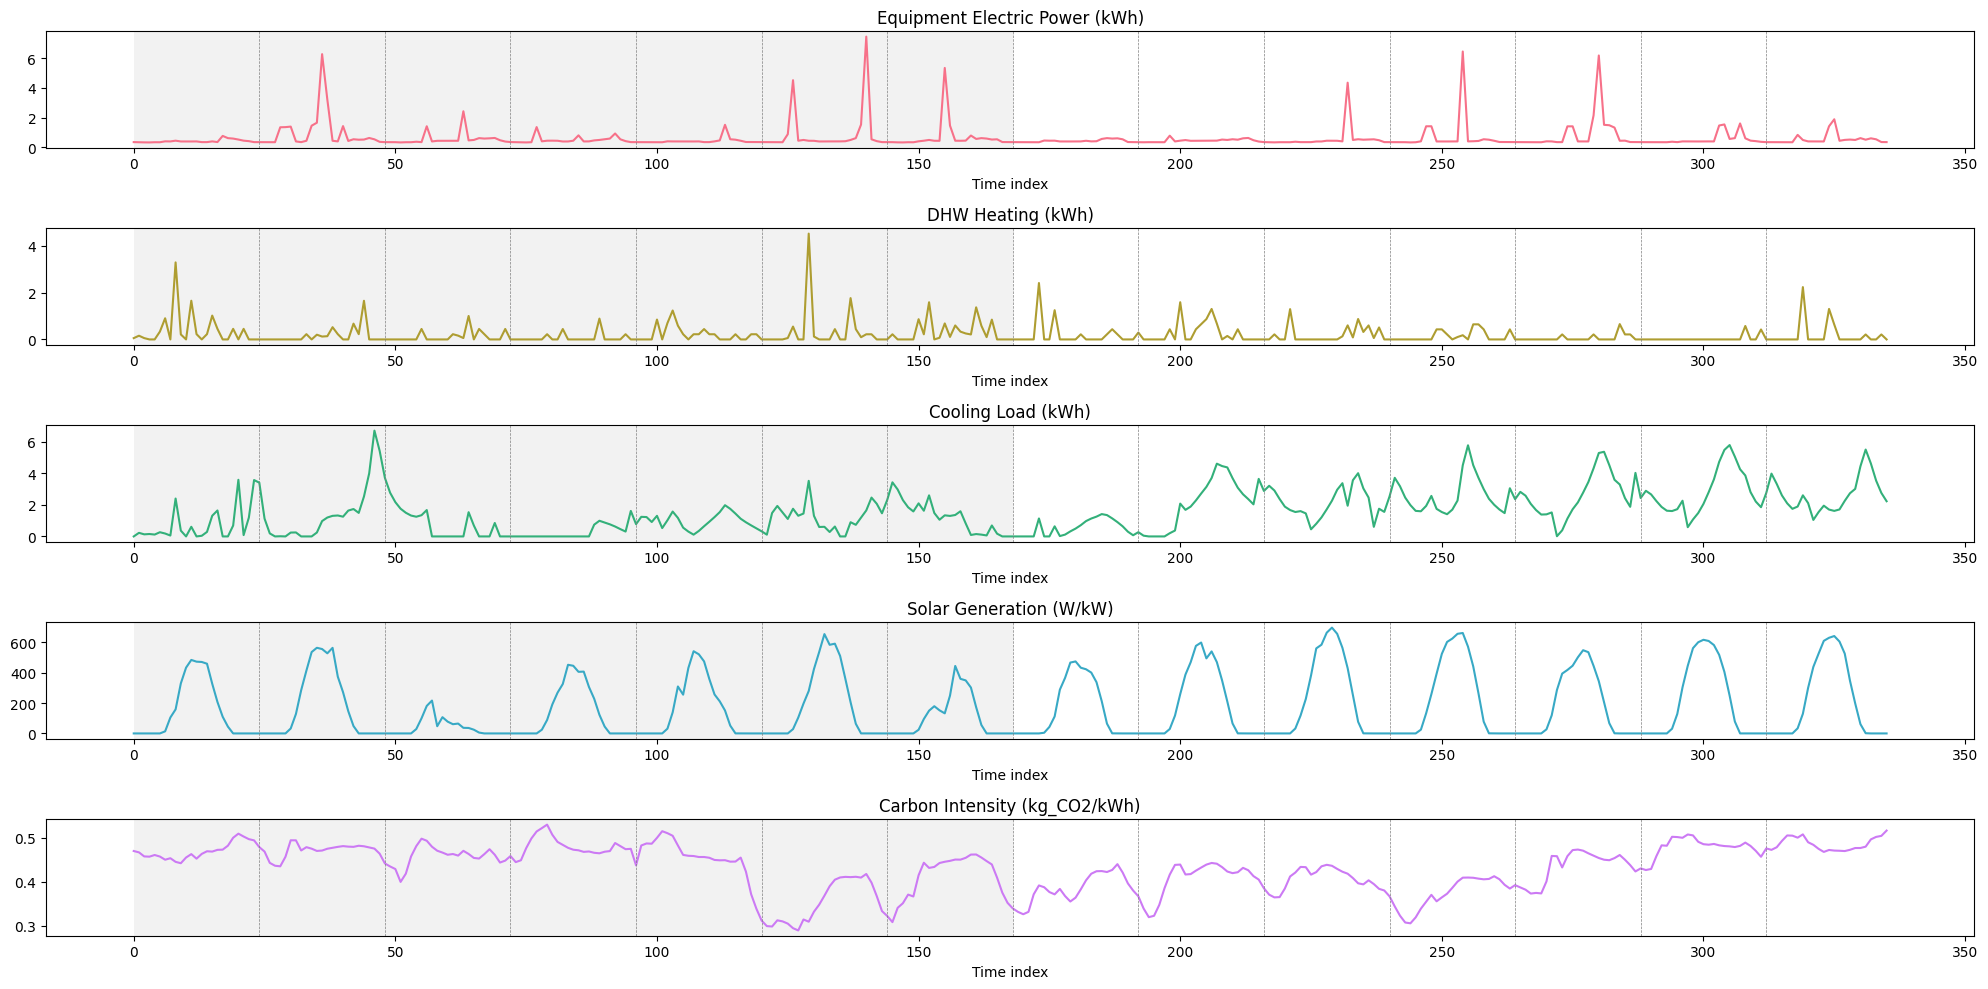

In [6]:
# plot the variables in function of time (index)

VARIABLES_TO_FORECAST2 = [
    "Equipment Electric Power (kWh)", # "non_shiftable_load",
    "DHW Heating (kWh)", # "dhw_demand",
    "Cooling Load (kWh)", # "cooling_demand",
    "Solar Generation (W/kW)", # "solar_generation",
    "Carbon Intensity (kg_CO2/kWh)" # "carbon_intensity",
]

fig, axes = plt.subplots(nrows=len(VARIABLES_TO_FORECAST2), ncols=1, figsize=(20, 10))
colors = sns.color_palette("husl", len(VARIABLES_TO_FORECAST2))

src_data = data.iloc[:24*7*2]

for i, var in enumerate(VARIABLES_TO_FORECAST2):
    sns.lineplot(x=src_data.index, y=src_data[var], ax=axes[i], color=colors[i])
    axes[i].set_title(var)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("Time index")
    # plot vertical lines to separate the different days (each 24 time steps)
    for j in range(1, src_data.shape[0] // 24):
        axes[i].axvline(x=j*24, color='grey', linestyle='--', linewidth=0.5)

    # put a different light background for each week (each 24*7 time steps)
    axes[i].axvspan(0, 24*7, facecolor='grey', alpha=0.1)
    # axes[i].axvspan(24*14, 24*21, facecolor='grey', alpha=0.1)

    
plt.tight_layout()

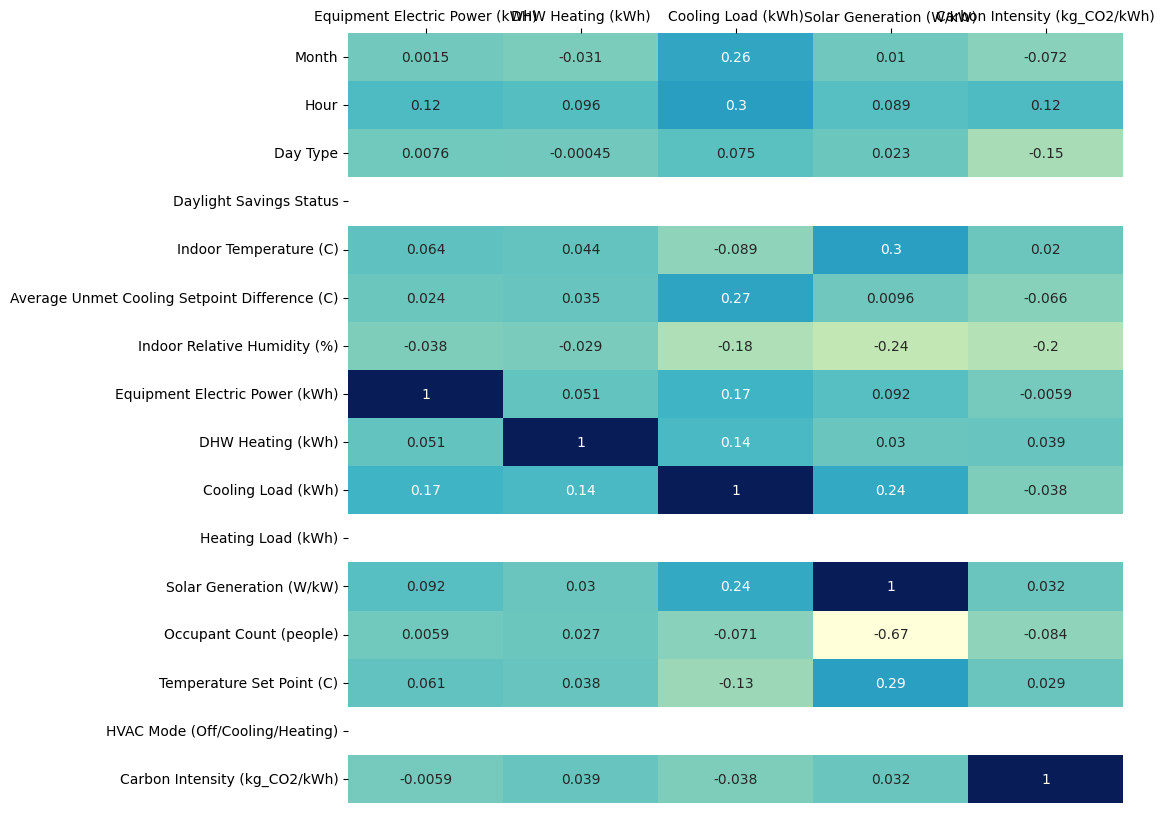

In [7]:
# plot the correlation matrix
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr()[VARIABLES_TO_FORECAST], annot=True, cmap="YlGnBu", cbar=False)
# put the xlabel on top
plt.gca().xaxis.tick_top()
plt.show()

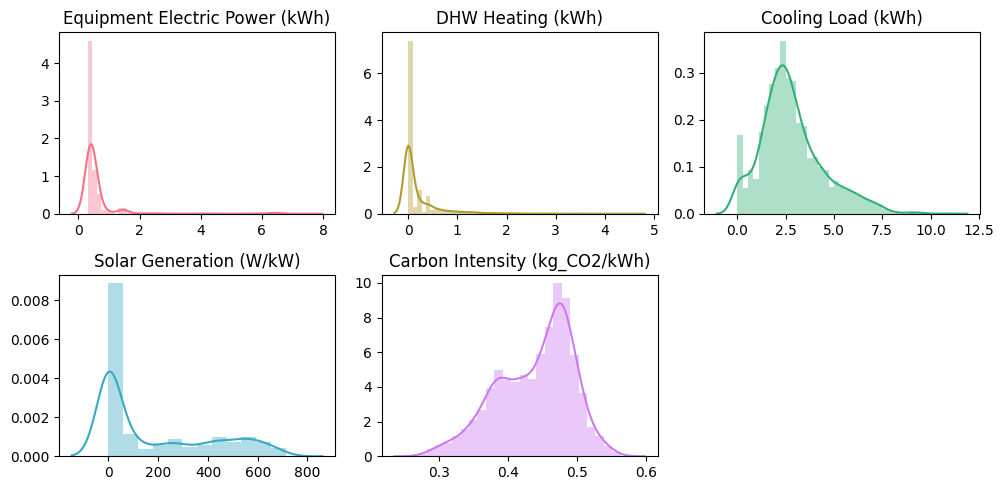

In [8]:
def plot_distribution():
    # plot distribution of the variables
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
    colors = sns.color_palette("husl", len(VARIABLES_TO_FORECAST))

    # ignore deprecation warning
    import warnings
    warnings.filterwarnings("ignore")

    for i, var in enumerate(VARIABLES_TO_FORECAST[:3]):
        sns.distplot(data[var], ax=axes[0, i], color=colors[i], kde=True)
        axes[0, i].set_title(var)
        axes[0, i].set_ylabel("")
        axes[0, i].set_xlabel("")

    for i, var in enumerate(VARIABLES_TO_FORECAST[3:]):
        sns.distplot(data[var], ax=axes[1, i], color=colors[i+3], kde=True)
        axes[1, i].set_title(var)
        axes[1, i].set_ylabel("")
        axes[1, i].set_xlabel("")

    # discard the last subplot
    axes[1, 2].set_visible(False)

    plt.tight_layout()

plot_distribution()

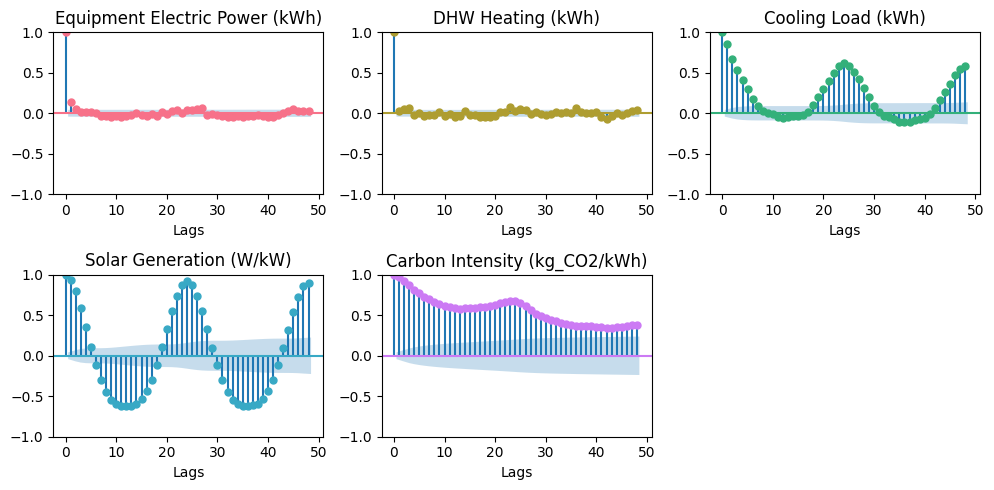

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

# plot autocorrelation of the variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
colors = sns.color_palette("husl", len(VARIABLES_TO_FORECAST))

for i, var in enumerate(VARIABLES_TO_FORECAST[:3]):
    plot_acf(data[var], ax=axes[0, i], color=colors[i], lags=48)
    axes[0, i].set_title(var)
    axes[0, i].set_ylabel("")
    axes[0, i].set_xlabel("Lags")

for i, var in enumerate(VARIABLES_TO_FORECAST[3:]):
    plot_acf(data[var], ax=axes[1, i], color=colors[i+3], lags=48)
    axes[1, i].set_title(var)
    axes[1, i].set_ylabel("")
    axes[1, i].set_xlabel("Lags")

# discard the last subplot
axes[1, 2].set_visible(False)

plt.tight_layout()
